# Enhanced rule symbolic and analytical implementation

This notebook presents the enhanced rule for the fatigue model for plain concrete under uniaxial compressive loading, sugessted by A. Baktheer et al. in [Enhanced assessment rule for concrete fatigue under compression considering the nonlinear effect of loading sequence](https://www.researchgate.net/publication/332636421_Enhanced_assessment_rule_for_concrete_fatigue_under_compression_considering_the_nonlinear_effect_of_loading_sequence)

In this paper, a refined engineering rule for the assessment of remaining fatigue life of concrete under compressive cyclic loading with varying amplitudes is proposed. The rule has been derived based on a combined numerical and experimental investigation of the loading sequence effect. The applied modeling approach is based on a damage model using the equivalent tensile strain rate to govern the fatigue damage evolution upon loading and reloading at subcritical load levels. A systematic calibration and validation procedure of the numerical model was performed based on the available experimental results. The prediction of the numerical model was compared with existing damage accumulation rules for the assessment of the concrete fatigue life exposed to varying loading ranges. Based on these studies, an enhancement of the Palmgren-Miner rule is proposed and validated for several loading sequence scenarios.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import Piecewise

### 5. Enhanced rule for the loading sequence effect

#### 5.1. Correction term for the P-M rule

##### eq 27:
The expression for the consumed fatigue life under a loading scenario consisting of n varying loading ranges is proposed in
the form

$$\eta  =  \sum_{i=1}^{n} \eta_i + \sum_{i=1}^{n-1} \Delta\eta_i$$

$$\rho_i  = N_i / N^f_i$$

$$ \Delta\eta_i \overset{\mathrm{def}}{=} \mathscr{R} (\bar{S}_i, \Delta S_i^{max}, \Delta S_i^{min}, \tilde{\eta_i})$$

$$\bar{S}_i = (S_i^m + S_{i+1}^m)  /  2$$

$$S_i^m = (S_i^{max} + S_i^{min})  /  2$$

$$S_{i+1}^m = (S_{i+1}^{max} + S_{i+1}^{min})  /  2$$

$$\Delta S_i^{max} = S_{i+1}^{max} - S_i^{min}$$ 

$$\Delta S_i^{min} = S_{i+1}^{min} - S_i^{min}$$ 

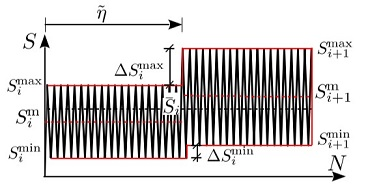

In [2]:
Delta_eta_i,Delta_eta_max, tilde_eta_i,eta_x = sp.symbols(
    r'\Delta\eta_i,\Delta\eta_{max},\tilde{\eta_i}, eta_x', 
    real=True, nonnegative=True
)

In [3]:
Delta_eta_i = sp.Piecewise(   
    
    ((Delta_eta_max * (1 - ((eta_x-tilde_eta_i) / eta_x))),  ((tilde_eta_i > 0) & (tilde_eta_i <= eta_x))) ,
        ((Delta_eta_max * ((tilde_eta_i - 1) / (eta_x - 1)) ,  ((tilde_eta_i > eta_x) & (tilde_eta_i < 1))))
)

Delta_eta_i

Piecewise((\Delta\eta_{max}*(1 - (-\tilde{\eta_i} + eta_x)/eta_x), (\tilde{\eta_i} <= eta_x) & (\tilde{\eta_i} > 0)), (\Delta\eta_{max}*(\tilde{\eta_i} - 1)/(eta_x - 1), (\tilde{\eta_i} > eta_x) & (\tilde{\eta_i} < 1)))

$$ \Delta\eta_{max} (\bar{S}, \Delta S^{max}) = [\mathit{f}_1(\Delta S^{max} + \mathit{f}_2 (\bar{S})] sign (\Delta S^{max})$$

$$ \mathit{f}_1 (\Delta S^{max}) = \mathrm{A} (\Delta S^{max})^2 + \mathrm{B} \Delta S^{max} sign (\Delta S^{max})$$

$$ \mathit{f}_2 (\bar{S}) = \mathrm{C} (\ 0.475 - \bar{S})$$

In [4]:
A = -10.66
B = 6.1
C = 2

$\beta_\downarrow$

In [5]:
eta_uparrow, eta_downarrow, beta_uparrow, beta_downarrow, Delta_eta_max, tan = sp.symbols(
    r'\eta_\uparrow, \eta_\downarrow, \beta_\uparrow, \beta_\downarrow,\Delta\eta_{max},\tan', 
    real=True, nonnegative=True
)

In [18]:
eta_x = sp.Piecewise(   
    
    ((eta_uparrow + Delta_eta_max / tan * (beta_uparrow)) , (Delta_eta_max > 0)),
    ((eta_downarrow + Delta_eta_max / tan * (beta_downarrow)) , (Delta_eta_max <= 0)),
)

eta_x

Piecewise((\Delta\eta_{max}*\beta_\uparrow/\tan + \eta_\uparrow, \Delta\eta_{max} > 0), (\Delta\eta_{max}*\beta_\downarrow/\tan + \eta_\downarrow, True))

In [20]:
eta_uparrow = 0.74
beta_uparrow = 74.7
eta_downarrow = 0.59
beta_downarrow = 60.5

| Symbol | Unit | Description
| :-: | :-: | :- |
| $\rho^\mathrm{test}$ | % | Reinforcement ratio|
| $a_\mathrm{f}$ | $\frac{m^{2}}{m}$ | Fabric area per unit width |
| $d^\mathrm{test}$ | m | Cross-sectional thickness |

In [7]:
def get_rho_test(a_f, d_test):
    rho_test = np.divide(a_f, d_test) 
    return rho_test

In [8]:
a_f = [0.616e-4, 1.713e-4]
d_test = 0.01
rho_test = get_rho_test(a_f,d_test)
rho_test

array([0.00616, 0.01713])